In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree

from sklearn import metrics

from tqdm import tqdm

sb.set(rc={'figure.figsize':(20,20)})

## Dataset is from: <br>
### **Breast Cancer Wisconsin (Diagnostic) Data Set** <br>
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# Data Analysis

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

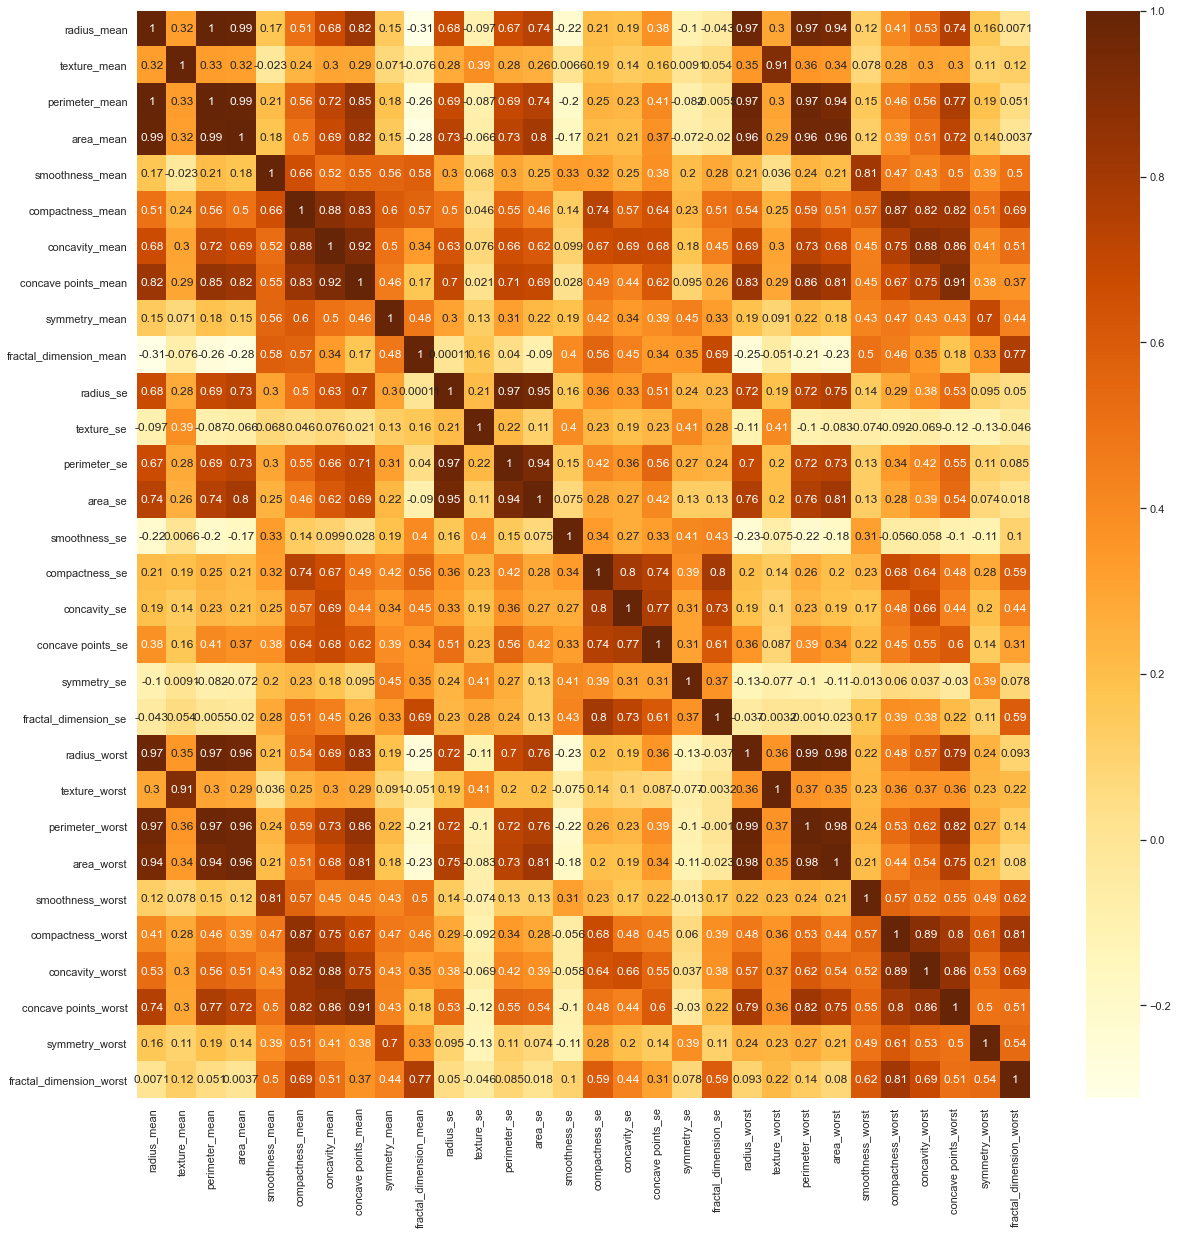

In [4]:
corr = df.corr()
sb.heatmap(corr, cmap="YlOrBr", annot=True)

# Models

In [5]:
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
y = df['diagnosis'].to_numpy()
df.drop(columns=['diagnosis'], inplace=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)

(381, 30) (188, 30)


In [7]:
def k_fold(clf, X, y, n_splits = 5):
    scores = []
    kf = KFold(n_splits=5)
    for train_index, test_index in tqdm(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    return sum(scores) / len(scores)

## SVC Classification

In [8]:
clf = svm.SVC()
print('KFold score is', k_fold(clf, X_train, y_train))
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(metrics.classification_report(y_test,clf.predict(X_test)))

5it [00:00, 71.31it/s]

KFold score is 0.8871155160628845
0.9521276595744681
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       121
           1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



Since there is a big difference between the cross validation score and test set score, SVC seems to be overfitting.

## Decision Tree Classifier

In [9]:
clf = tree.DecisionTreeClassifier()
print('KFold score is', k_fold(clf, X_train, y_train))
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(metrics.classification_report(y_test,clf.predict(X_test)))

5it [00:00, 80.70it/s]


KFold score is 0.9001367053998633
0.898936170212766
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       121
           1       0.83      0.90      0.86        67

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



There is not an overfit or high bias situation here. However, precision is lower than the random forest classification precision for the malignant tumors.
F1-Score for the decision tree classifier, which represents a more balanced view to the precision-recall problem is lower than the random forest classification's F1-Score again.

## Random Forest Classification

In [10]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
print('KFold score is', k_fold(clf, X_train, y_train))
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(metrics.classification_report(y_test,clf.predict(X_test)))

5it [00:00,  6.23it/s]


KFold score is 0.960663021189337
0.9574468085106383
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



Random Forest is the best model, it outperformed other models in this problem in terms of precision recall and f1-scores. Since Random Forest is an ensemble learning method, it is a very powerful method for most of the problems and 0.95 score in cross validation and test sets is a very accurate score.

## Grid Search for All Models

### SVC

In [11]:
%%time
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}
clf = svm.SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.score(X_test, y_test))

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.9414893617021277
CPU times: user 5min 24s, sys: 2.06 s, total: 5min 26s
Wall time: 5min 38s


### Decision Tree Classifier

In [12]:
%%time
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[5,10,20,50,120,150]
}
clf = tree.DecisionTreeClassifier()
gs = GridSearchCV(clf, param_grid)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': 20}
0.9468085106382979
CPU times: user 423 ms, sys: 5.39 ms, total: 428 ms
Wall time: 430 ms


### RandomForestClassifier

In [13]:
%%time
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}
clf = RandomForestClassifier(random_state=0)
gs = GridSearchCV(clf, param_grid)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.score(X_test, y_test))

{'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 500}
0.9627659574468085
CPU times: user 1min 23s, sys: 1.29 s, total: 1min 24s
Wall time: 1min 28s


## Feature Selection Models

In [14]:
def order_features(coef):
    important_features_dict = {}
    for idx, val in enumerate(coef):
        important_features_dict[idx] = val

    important_features_list = sorted(important_features_dict,
                                     key=important_features_dict.get,
                                     reverse=True)
    return important_features_list

### SVC
I have selected SVC, DecisionTree and RandomForest as models. DecisionTree and RandomForest classifiers are tree based and they can be processed as tree based feature selection, however, SVC is not tree based.

In [15]:
from sklearn.feature_selection import SelectFromModel
params = {'C': 10, 'gamma': 1, 'kernel': 'linear'}
clf = svm.SVC(**params)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = svm.SVC(**params)
clf = clf.fit(X_train, y_train)

n_features = 5
model = SelectFromModel(clf, prefit=True, threshold=-np.inf, max_features=n_features)
X_new = model.transform(X_train)
important_indexes = order_features(model.estimator.coef_[0])[:n_features]
print("Important feature indexes ordered:",important_indexes)

clf = svm.SVC(**params,)
clf = clf.fit(X_new, y_train)
print(clf.score(model.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test))))

0.9414893617021277
Important feature indexes ordered: [28, 26, 27, 24, 25]
0.9361702127659575
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       121
           1       0.92      0.90      0.91        67

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



### Feature selection with this setting does not really improve SVC's performance.

### Decision Tree Classifier

In [16]:
params = {'criterion': 'entropy', 'max_depth': 5}

clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_train, y_train)

n_features = 5
model = SelectFromModel(clf, prefit=True, threshold=-np.inf, max_features=n_features)
X_new = model.transform(X_train)
important_indexes = order_features(model.estimator.feature_importances_)[:n_features]
print("Important feature indexes ordered:",important_indexes)

clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_new, y_train)
print(clf.score(model.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test))))

0.9468085106382979
Important feature indexes ordered: [7, 21, 22, 20, 27]
0.9574468085106383
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       121
           1       0.97      0.91      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



### Feature selection improved Decision Tree Classifier's performance from around 0.9 to 0.95.

## Random Forest Classifier

In [17]:
params = {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 500}

clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)

n_features = 5
model = SelectFromModel(clf, prefit=True, threshold=-np.inf, max_features=n_features)
X_new = model.transform(X_train)
important_indexes = order_features(model.estimator.feature_importances_)[:n_features]
print("Important feature indexes ordered:",important_indexes)

clf = RandomForestClassifier(**params)
clf = clf.fit(X_new, y_train)
print(clf.score(model.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test))))

0.9574468085106383
Important feature indexes ordered: [27, 7, 22, 23, 20]
0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.97      0.94      0.95        67

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



### Feature selection method with this setting does not respond very well to random forest, random forest gets the feature elimination inside its algorithm though.

## Recursive Feature Selection Models

In [18]:
from sklearn.feature_selection import RFE

params = {'C': 10, 'gamma': 1, 'kernel': 'linear'}

clf = svm.SVC(**params)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = svm.SVC(**params)

n_features = 5
selector = RFE(clf, n_features_to_select=n_features, step=1)
selector = selector.fit(X_train, y_train)
X_new = selector.transform(X_train)
important_indexes = np.where(selector.ranking_==1)[0]
print("Important feature indexes (not ordered):", important_indexes)

clf = svm.SVC(**params)
clf = clf.fit(X_new, y_train)
print(clf.score(selector.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test)),zero_division=0))
clf.predict(model.transform(X_test))

0.9414893617021277
Important feature indexes (not ordered): [ 7  8 10 27 28]
0.925531914893617
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.36      1.00      0.53        67

    accuracy                           0.36       188
   macro avg       0.18      0.50      0.26       188
weighted avg       0.13      0.36      0.19       188



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### SVC is not fittting good with the feature elimination in both recursive and classic style. Here the model predicted all the data as 1 and shown a result that has precision and recall equal to 0 for negative labels. However, the skewed test set distribution might make it seem more successfull than it is, since test labels have more 1's than 0's.

In [19]:
params = {'criterion': 'entropy', 'max_depth': 5}

clf = tree.DecisionTreeClassifier(**params)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = tree.DecisionTreeClassifier(**params)

n_features = 5
selector = RFE(clf, n_features_to_select=n_features, step=1)
selector = selector.fit(X_train, y_train)
X_new = selector.transform(X_train)
important_indexes = np.where(selector.ranking_==1)[0]
print("Important feature indexes (not ordered):", important_indexes)

clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_new, y_train)
print(clf.score(selector.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test))))

0.9468085106382979
Important feature indexes (not ordered): [ 7 20 21 22 27]
0.9574468085106383
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       121
           1       0.82      0.97      0.89        67

    accuracy                           0.91       188
   macro avg       0.90      0.93      0.91       188
weighted avg       0.93      0.91      0.92       188



### There is little to no difference between tree-based feature selection and recursive feature selection for Decision Tree.

In [20]:
params = {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 500}

clf = RandomForestClassifier(**params)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = RandomForestClassifier(**params)

n_features = 5
selector = RFE(clf, n_features_to_select=n_features, step=1)
selector = selector.fit(X_train, y_train)
X_new = selector.transform(X_train)
important_indexes = np.where(selector.ranking_==1)[0]
print("Important feature indexes (not ordered):", important_indexes)

clf = RandomForestClassifier(**params)
clf = clf.fit(X_new, y_train)
print(clf.score(selector.transform(X_test), y_test))
print(metrics.classification_report(y_test,clf.predict(model.transform(X_test))))

0.9574468085106383
Important feature indexes (not ordered): [ 7 20 22 23 27]
0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.97      0.94      0.95        67

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



### The Best Performance Yielding Model is RandomForest in This Project

* Although it is a slight improvement from plain RandomForest to grid searched and feature eliminated Random Forest. It has improved to give 0.9680 score for its mean accuracy (which is clf.score).
* I observed that among all the models Random Forest always kept the highest f1-score and mean accuracy.
* As I explained above in the first part, since Random Forest is an ensemble method, it puts many models into use and combine their outputs to give better results.
* It is also an useful feature that random forest balances this "wisdom of the crowds" approach and use them to get a more generalized model. This generalization appears in the classification reports of the random forest as high and balanced scores.